In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv'

In [3]:
!wget $data -O data-week-4-hw.csv

--2025-10-21 12:46:24--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80876 (79K) [text/plain]
Saving to: ‘data-week-4-hw.csv’

data-week-4-hw.csv  100%[===================>]  78.98K  --.-KB/s    in 0.002s  

2025-10-21 12:46:24 (34.0 MB/s) - ‘data-week-4-hw.csv’ saved [80876/80876]



In [4]:
df = pd.read_csv("data-week-4-hw.csv")
print(df.shape)
df.head()

(1462, 9)


,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


#### Data Prep

In [5]:
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [6]:
categorical = list(df.dtypes[df.dtypes == 'object'].index)
print(categorical)
numerical = list(df.dtypes[df.dtypes != 'object'].index)
print(numerical)

['lead_source', 'industry', 'employment_status', 'location']
['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score', 'converted']


In [7]:
df[categorical] = df[categorical].fillna('NA')
df[numerical] = df[numerical].fillna(0.0)

In [8]:
df[numerical].isnull().sum()

number_of_courses_viewed    0
annual_income               0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [11]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [12]:
len(df_train), len(df_val), len(df_test)

(876, 293, 293)

In [13]:
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

In [14]:
del df_train['converted']
del df_val['converted']
del df_test['converted']

### Q1

In [15]:
from sklearn.metrics import roc_auc_score, auc

In [17]:
numerical = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']

roc_auc_score(y_train, df_train['number_of_courses_viewed'])

0.7635680590007088

In [27]:
for var in numerical:
    score = roc_auc_score(y_train, df_train[var])
    print('%s %.3f' % (var, score))

#number_of_courses_viewed has highest AUC

number_of_courses_viewed 0.764
annual_income 0.552
interaction_count 0.738
lead_score 0.614


### Q2

In [28]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [29]:
def train(df_train, y_train):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [30]:
dv, model = train(df_train, y_train)

In [31]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient = 'records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [32]:
y_pred = predict(df_val, dv, model)

In [37]:
round(roc_auc_score(y_val, y_pred), 2)

0.82

### Q3

In [42]:
thresholds = np.arange(0, 1.01, 0.01)
thresholds

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [43]:
scores = []

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum() # when both are true
    tn = (predict_negative & actual_negative).sum() # when both are false

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    p = tp / (tp + fp)
    r = tp / (tp + fn)

    scores.append((t, p, r))

columns = ['threshold',  'precision', 'recall']
df_scores = pd.DataFrame(scores, columns=columns)


/tmp/ipykernel_1822/2452034548.py:16: RuntimeWarning: invalid value encountered in scalar divide
  p = tp / (tp + fp)


In [53]:
df_scores.isnull().sum()

threshold    0
precision    3
recall       0
dtype: int64

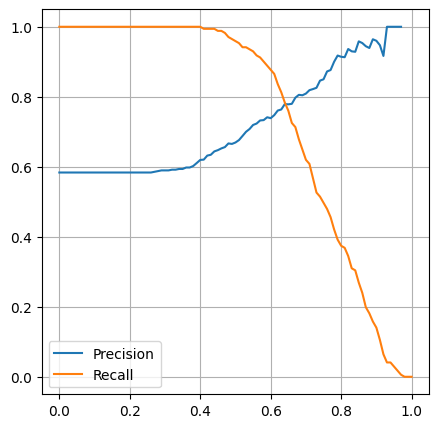

In [57]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.threshold, df_scores['precision'], label = 'Precision')
plt.plot(df_scores.threshold, df_scores['recall'], label = 'Recall')

plt.legend()
plt.grid(True)

#intersect around 0.745

### Q4

In [58]:
scores = []

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum() # when both are true
    tn = (predict_negative & actual_negative).sum() # when both are false

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    p = tp / (tp + fp)
    r = tp / (tp + fn)
    f1 = (2 * p * r) / (p + r)

    scores.append((t, p, r, f1))

columns = ['threshold',  'precision', 'recall', 'f1']
df_scores = pd.DataFrame(scores, columns=columns)


/tmp/ipykernel_1822/3735349808.py:16: RuntimeWarning: invalid value encountered in scalar divide
  p = tp / (tp + fp)


In [64]:
df_scores[df_scores.f1 == df_scores.f1.max()]

,threshold,precision,recall,f1
57,0.57,0.732394,0.912281,0.8125


In [75]:
df_scores.iloc[[54],:]

,threshold,precision,recall,f1
54,0.54,0.707965,0.935673,0.806045


### Q5

In [ ]:
from sklearn.model_selection import KFold

In [83]:
scores = []

kfold = KFold(n_splits=5, shuffle=True, random_state=1)
    
for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.converted.values
    y_val = df_val.converted.values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('%.3f +- %.4f' % (np.mean(scores), np.std(scores)))

0.822 +- 0.0358


### Q6

In [82]:
from tqdm.auto import tqdm

In [85]:
def train(df_train, y_train, C):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [87]:
n_splits = 5

for C in tqdm([0.000001, 0.001, 1]):

    scores = []

    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.converted.values
        y_val = df_val.converted.values

        dv, model = train(df_train, y_train, C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/3 [00:00<?, ?it/s]

C=1e-06 0.560 +- 0.024
C=0.001 0.867 +- 0.029
C=1 0.822 +- 0.036
